In [3]:
%pip install pandas numpy matplotlib seaborn scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
file_path = 'Life_Expectancy_Data.csv' 
df = pd.read_csv(file_path, delimiter=';')

print("--- 5 Baris Pertama Data ---")
print(df.head())
print("\n--- Informasi Data (Termasuk Tipe Data) ---")
df.info()

# Lakukan normalisasi nama kolom untuk kemudahan akses (misalnya, menghapus spasi di awal/akhir)
df.columns = df.columns.str.strip()

--- 5 Baris Pertama Data ---
       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01          7.127.962.362         65.0      1154  ...   
1             64     0.01          7.352.358.168         62.0       492  ...   
2             66     0.01          7.321.924.272         64.0       430  ...   
3             69     0.01            781.842.153         67.0      2787  ...   
4             71     0.01          7.097.108.703         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS          GD

In [12]:
# Cek jumlah nilai hilang per kolom
print("\n--- Jumlah Nilai Hilang per Kolom ---")
print(df.isnull().sum())

# Kolom-kolom yang akan kita tangani missing values-nya dengan mean:
cols_to_fill = [
    'Life expectancy', 'Adult Mortality', 'Alcohol', 
    'Hepatitis B', 'BMI', 'Polio', 'Total expenditure', 
    'Diphtheria', 'GDP', 'Population', 'thinness  1-19 years', 
    'thinness 5-9 years', 'Income composition of resources', 'Schooling'
]

# Isi nilai hilang dengan mean dari kolom masing-masing
for col in cols_to_fill:
    # Hanya isi jika kolom tersebut memiliki NaN
    if df[col].isnull().any():
        df[col].fillna(df[col].mean(), inplace=True)

print("\n--- Jumlah Nilai Hilang Setelah Cleaning ---")
print(df.isnull().sum().sum()) # Seharusnya menjadi 0 jika semua kolom numerik sudah ditangani


--- Jumlah Nilai Hilang per Kolom ---
Country                               0
Year                                  0
Life expectancy                       0
Adult Mortality                       0
infant deaths                         0
Alcohol                               0
percentage expenditure             2305
Hepatitis B                           0
Measles                               0
BMI                                   0
under-five deaths                     0
Polio                                 0
Total expenditure                     0
Diphtheria                            0
HIV/AIDS                              0
GDP                                   0
Population                            0
thinness  1-19 years                  0
thinness 5-9 years                    0
Income composition of resources       0
Schooling                             0
Status_Developing                     0
dtype: int64

--- Jumlah Nilai Hilang Setelah Cleaning ---
2305


In [16]:
# One-Hot Encoding untuk kolom 'Status' (hanya jika kolom ada)
if 'Status' in df.columns:
	df = pd.get_dummies(df, columns=['Status'], drop_first=True)
	print("Kolom 'Status' ditemukan dan di-encode.")
elif 'Status_Developing' in df.columns or 'Status_Developed' in df.columns:
	# Sudah ter-encode sebelumnya, tidak perlu melakukan apa-apa
	print("Kolom status sudah ter-encode sebelumnya.")
else:
	# Kolom tidak ada — lewati encoding untuk menghindari KeyError
	print("Kolom 'Status' tidak ditemukan, melewati One-Hot Encoding.")

print("\n--- Data Setelah One-Hot Encoding / Pengecekan ---")
print(df.head())

Kolom status sudah ter-encode sebelumnya.

--- Data Setelah One-Hot Encoding / Pengecekan ---
       Country  Year  Life expectancy  Adult Mortality  infant deaths  \
0  Afghanistan  2015             65.0            263.0             62   
1  Afghanistan  2014             59.9            271.0             64   
2  Afghanistan  2013             59.9            268.0             66   
3  Afghanistan  2012             59.5            272.0             69   
4  Afghanistan  2011             59.2            275.0             71   

   Alcohol  percentage expenditure  Hepatitis B  Measles   BMI  ...  \
0     0.01                     NaN         65.0     1154  19.1  ...   
1     0.01                     NaN         62.0      492  18.6  ...   
2     0.01                     NaN         64.0      430  18.1  ...   
3     0.01                     NaN         67.0     2787  17.6  ...   
4     0.01                     NaN         68.0     3013  17.2  ...   

   Total expenditure  Diphtheria  HIV/AI

In [17]:
# Hitung matriks korelasi (hanya menggunakan data yang sudah bersih/diproses)
correlation_matrix = df.drop(['Country', 'Year'], axis=1).corr()

# Tampilkan korelasi Life expectancy dengan variabel lain, diurutkan
print("\n--- Korelasi dengan 'Life expectancy' ---")
# Urutkan berdasarkan nilai absolut korelasi
print(
    correlation_matrix['Life expectancy']
    .sort_values(ascending=False)
)


--- Korelasi dengan 'Life expectancy' ---
Life expectancy                    1.000000
Schooling                          0.715066
Income composition of resources    0.692483
BMI                                0.559255
Diphtheria                         0.475418
Polio                              0.461574
Alcohol                            0.391598
Total expenditure                  0.207981
Hepatitis B                        0.203771
GDP                                0.022454
Population                        -0.019638
Measles                           -0.157574
percentage expenditure            -0.174843
infant deaths                     -0.196535
under-five deaths                 -0.222503
thinness 5-9 years                -0.466629
thinness  1-19 years              -0.472162
Status_Developing                 -0.481962
HIV/AIDS                          -0.556457
Adult Mortality                   -0.696359
Name: Life expectancy, dtype: float64


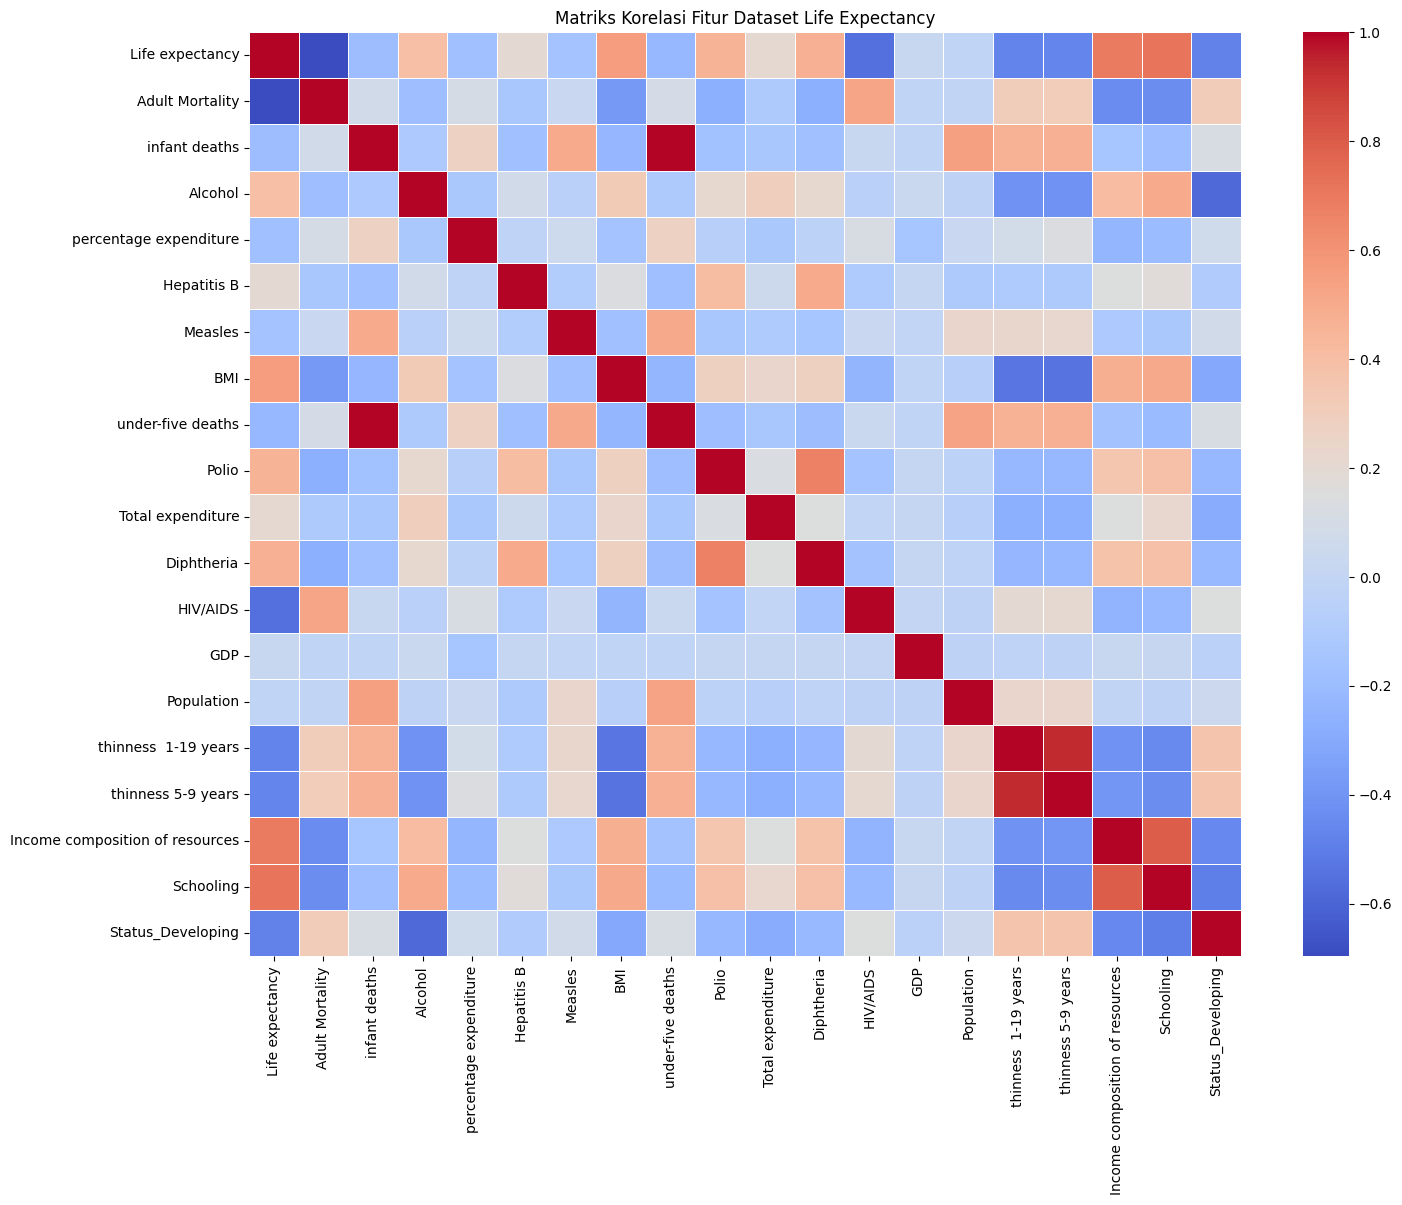

In [18]:
# Plot Heatmap Korelasi
plt.figure(figsize=(16, 12))
sns.heatmap(
    correlation_matrix, 
    annot=False, # Set ke True jika ingin melihat angka korelasi, tapi bisa terlalu ramai
    fmt=".2f", 
    cmap='coolwarm',
    cbar=True,
    linewidths=.5
)
plt.title('Matriks Korelasi Fitur Dataset Life Expectancy')
plt.show()

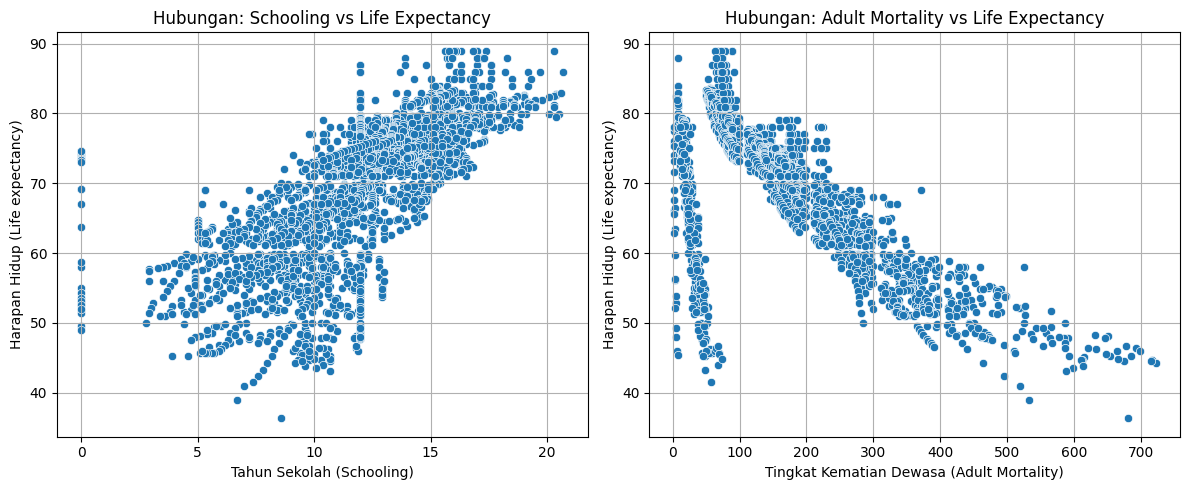

In [19]:
# Asumsi korelasi positif terkuat (contoh: Schooling)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Schooling', y='Life expectancy', data=df)
plt.title('Hubungan: Schooling vs Life Expectancy')
plt.xlabel('Tahun Sekolah (Schooling)')
plt.ylabel('Harapan Hidup (Life expectancy)')
plt.grid(True)

# Asumsi korelasi negatif terkuat (contoh: Adult Mortality)
plt.subplot(1, 2, 2)
sns.scatterplot(x='Adult Mortality', y='Life expectancy', data=df)
plt.title('Hubungan: Adult Mortality vs Life Expectancy')
plt.xlabel('Tingkat Kematian Dewasa (Adult Mortality)')
plt.ylabel('Harapan Hidup (Life expectancy)')
plt.grid(True)

plt.tight_layout()
plt.show()

In [20]:
# =========================================================
# 1. Log Transformation (Menangani Skewness)
# =========================================================

# Berdasarkan hasil eksplorasi (Skewness: Population, GDP sangat tinggi),
# kita akan menerapkan transformasi logaritmik (menggunakan np.log1p yang menangani nilai nol dengan baik).

# Kolom yang akan ditransformasi:
log_features = ['Population', 'GDP', 'percentage expenditure']

for col in log_features:
    # Cek apakah kolom tersebut ada sebelum mencoba mentransformasi
    if col in df.columns:
        # Gunakan np.log1p(x) = log(1+x). Ini lebih aman daripada np.log(x) karena dapat 
        # menangani nilai nol atau nilai yang sangat kecil
        df[f'Log_{col}'] = np.log1p(df[col])
        
        # Opsional: Kita bisa menghapus kolom asli yang skewed (untuk menghindari Multikolinearitas)
        # df.drop(col, axis=1, inplace=True) 

print("--- Data Setelah Log Transformation ---")
print(df[[col for col in df.columns if 'Log_' in col]].head())


# =========================================================
# 2. Fitur Interaksi (Interaction Features)
# =========================================================

# Kita buat fitur interaksi dari dua variabel yang memiliki korelasi kuat
# dengan Life Expectancy dan mungkin memiliki efek sinergis.
# Contoh: Pendidikan (Schooling) dikalikan dengan Komposisi Pendapatan Sumber Daya (Income composition of resources)

df['Schooling_x_Income'] = df['Schooling'] * df['Income composition of resources']

print("\n--- Data Setelah Membuat Fitur Interaksi ---")
print(df[['Schooling', 'Income composition of resources', 'Schooling_x_Income']].head())

# =========================================================
# Pengecekan Akhir Fitur
# =========================================================

print(f"\nJumlah Fitur Baru: {len(log_features) + 1}") 
print(f"Total Jumlah Kolom Sekarang: {df.shape[1]}")

--- Data Setelah Log Transformation ---
   Log_Population   Log_GDP  Log_percentage expenditure
0       17.334091  8.838990                         NaN
1       12.699497  8.838990                         NaN
2       17.272826  8.838990                         NaN
3       15.123021  6.508708                         NaN
4       14.906964  8.838990                         NaN

--- Data Setelah Membuat Fitur Interaksi ---
   Schooling  Income composition of resources  Schooling_x_Income
0       10.1                            0.479              4.8379
1       10.0                            0.476              4.7600
2        9.9                            0.470              4.6530
3        9.8                            0.463              4.5374
4        9.5                            0.454              4.3130

Jumlah Fitur Baru: 4
Total Jumlah Kolom Sekarang: 26

--- Data Setelah Membuat Fitur Interaksi ---
   Schooling  Income composition of resources  Schooling_x_Income
0       10.1    

In [21]:
# Tentukan variabel target (y)
y = df['Life expectancy']

# Tentukan fitur (X). Hapus 'Country', 'Year', dan target 'Life expectancy'
X = df.drop(['Country', 'Year', 'Life expectancy'], axis=1)

print("\n--- Fitur (X) Setelah Drop Kolom Non-Numerik ---")
print(X.columns)


--- Fitur (X) Setelah Drop Kolom Non-Numerik ---
Index(['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
       'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio',
       'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'thinness  1-19 years', 'thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Status_Developing',
       'Log_Population', 'Log_GDP', 'Log_percentage expenditure',
       'Schooling_x_Income'],
      dtype='object')


In [22]:
# Bagi data: 80% untuk training, 20% untuk testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42 # Untuk hasil yang konsisten
)

print(f"\nUkuran Training Set: {X_train.shape}")
print(f"Ukuran Testing Set: {X_test.shape}")


Ukuran Training Set: (2350, 23)
Ukuran Testing Set: (588, 23)


In [24]:
# Handle missing values in X_train and X_test before training
from sklearn.impute import SimpleImputer

# Create an imputer that fills NaN with the mean value
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on training data and transform both train and test sets
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Inisialisasi model
model = LinearRegression()

# Latih model menggunakan data training yang sudah ditangani NaN-nya
model.fit(X_train_imputed, y_train)

print("\n--- Model Linear Regression Telah Dilatih ---")


--- Model Linear Regression Telah Dilatih ---


In [27]:
# Membuat prediksi pada data testing
y_pred = model.predict(X_test_imputed)

# Menghitung Metrik Evaluasi:
# 1. Mean Squared Error (MSE): Rata-rata dari kuadrat error
mse = mean_squared_error(y_test, y_pred)
# 2. R-squared (R2): Seberapa baik model sesuai dengan data (0 hingga 1)
r2 = r2_score(y_test, y_pred)

print(f"\n--- Metrik Evaluasi Model ---")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared Score (R2): {r2:.4f}")


--- Metrik Evaluasi Model ---
Mean Squared Error (MSE): 15.45
R-squared Score (R2): 0.8216


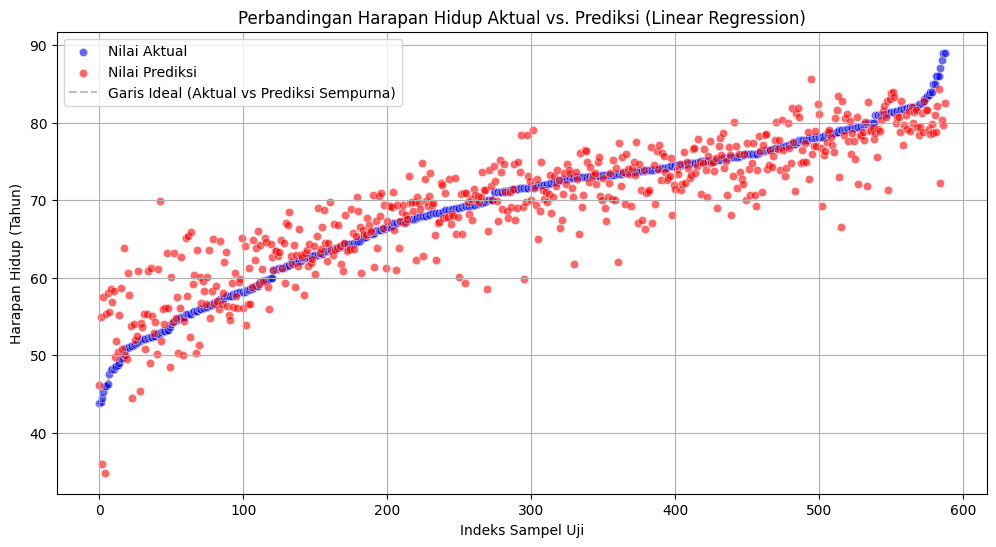

In [28]:
# Buat DataFrame untuk visualisasi perbandingan
comparison_df = pd.DataFrame({
    'Aktual': y_test, 
    'Prediksi': y_pred
})
comparison_df = comparison_df.sort_values(by='Aktual').reset_index(drop=True)

# Plot perbandingan
plt.figure(figsize=(12, 6))

# Plot nilai aktual
sns.scatterplot(x=comparison_df.index, y='Aktual', data=comparison_df, color='blue', label='Nilai Aktual', alpha=0.6)
# Plot nilai prediksi
sns.scatterplot(x=comparison_df.index, y='Prediksi', data=comparison_df, color='red', label='Nilai Prediksi', alpha=0.6)
# Plot garis ideal (y=x) untuk referensi
plt.plot(comparison_df.index, comparison_df['Aktual'], color='gray', linestyle='--', label='Garis Ideal (Aktual vs Prediksi Sempurna)', alpha=0.5)

plt.title('Perbandingan Harapan Hidup Aktual vs. Prediksi (Linear Regression)')
plt.xlabel('Indeks Sampel Uji')
plt.ylabel('Harapan Hidup (Tahun)')
plt.legend()
plt.grid(True)
plt.show()

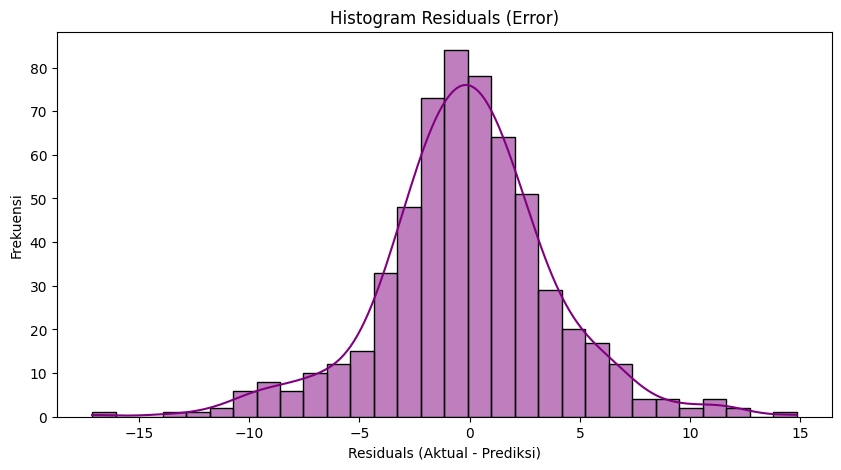

In [29]:
# Hitung Residuals (Error)
residuals = y_test - y_pred

plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True, bins=30, color='purple')
plt.title('Histogram Residuals (Error)')
plt.xlabel('Residuals (Aktual - Prediksi)')
plt.ylabel('Frekuensi')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9568\513583435.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


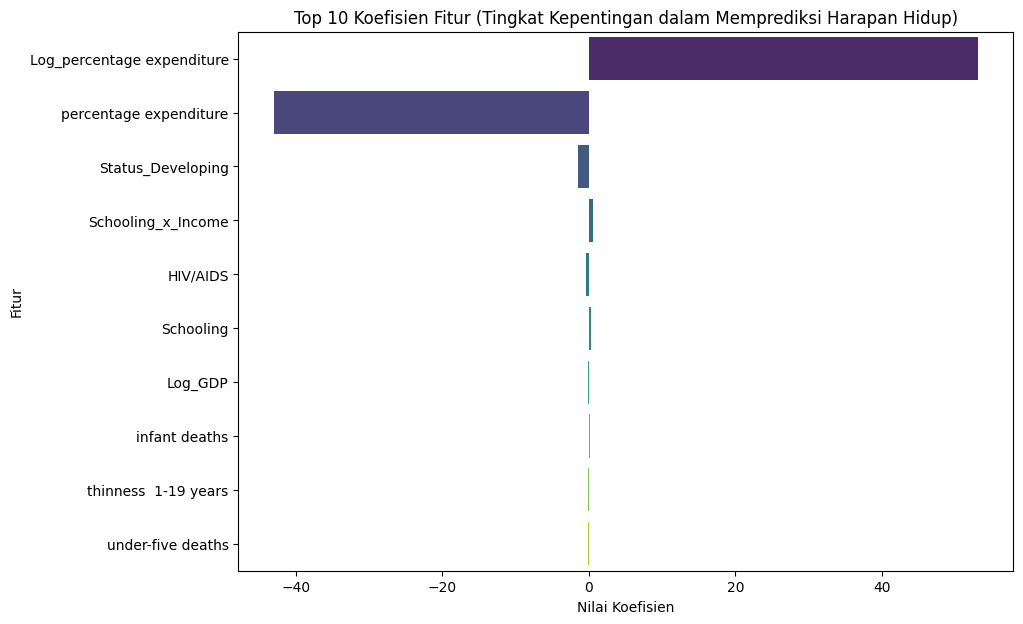

In [30]:
# =========================================================
# Visualisasi Koefisien Model (Fitur Penting)
# =========================================================

# Ambil nama fitur (X) dan koefisien (bobot)
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

# Hitung nilai absolut koefisien untuk mengurutkan berdasarkan kepentingan
coefficients['Abs_Coefficient'] = np.abs(coefficients['Coefficient'])
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

# Tampilkan 10 fitur terpenting
plt.figure(figsize=(10, 7))
sns.barplot(
    x='Coefficient', 
    y='Feature', 
    data=coefficients.head(10), 
    palette='viridis'
)
plt.title('Top 10 Koefisien Fitur (Tingkat Kepentingan dalam Memprediksi Harapan Hidup)')
plt.xlabel('Nilai Koefisien')
plt.ylabel('Fitur')
plt.show()